<a href="https://colab.research.google.com/github/aiyufan3/AIPI-XAI-Interpretable-ML/blob/main/AIPI_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment #03
### Description
**In this assignment, it aim to analyze a dataset from a telecommunications company to identify key factors influencing customer churn and build interpretable machine learning models. The goal is to predict which customers are likely to churn and provide recommendations based on model interpretability and performance.**

### Yufan Ai

#### Include the button below. Change the link to the location in your github repository:
#### https://colab.research.google.com/github/aiyufan3/AIPI-XAI-Interpretable-ML/blob/main/AIPI_Assignment3.ipynb


[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/aiyufan3/AIPI-XAI-Interpretable-ML/blob/main/AIPI_Assignment3.ipynb)

## DO:
* Use markdown and comments effectively
* Pull out classes and functions into scripts
* Ensure cells are executed in order and avoid skipping cells to maintain reproducibility
* Choose the appropriate runtime (i.e. GPU) if needed
* If you are using a dataset that is too large to put in your GitHub repository, you must either pull it in via Hugging Face Datasets or put it in an S3 bucket and use boto3 to pull from there.
* Use versioning on all installs (ie pandas==1.3.0) to ensure consistency across versions
* Implement error handling where appropriate

## DON'T:
* Absolutely NO sending us Google Drive links or zip files with data (see above).
* Load packages throughout the notebook. Please load all packages in the first code cell in your notebook.
* Add API keys or tokens directly to your notebook!!!! EVER!!!
* Include cells that you used for testing or debugging. Delete these before submission
* Have errors rendered in your notebook. Fix errors prior to submission.

#### Using environment variables in Google Colab

In Google Colab, locate the key button on the left side of the screen. You can enter in any environment variables or API keys here and they will remain private.

Then add the environment variables to your notebook using the code below.

Make sure to document in your notebook if you are using API keys and how to get them (ie share a link for documentation to get a Hugging Face API Key if you are using Hugging Face)

###Environment Set Up

In [1]:
!pip install pandas==1.5.3 numpy==1.23.5 seaborn==0.12.2 matplotlib==3.7.1 scikit-learn==1.2.2 statsmodels==0.14.0

  Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.15 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
albumentations 1.4.14 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
bigframes 1.17.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
pandas-stubs 2.1.4

In [2]:
!pip install pygam # install the missing package

  Using cached numpy-2.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2024.6.0 requires pandas>=2.0, but you have pandas 1.5.3 which is incompatible.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Gamma
from statsmodels.genmod.families.links import Log
from statsmodels.tools import add_constant
from pygam import LinearGAM, s
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from pygam import LogisticGAM

# Exploratory Data Analysis to check Assumptions

In this section, Visualizations and Statistical Analysis is to perform exploratory data analysis to check assumptions for linear regression, logistic regression, and GAM. Include visualizations like histograms, scatterplots, and correlation heatmaps. Check for linearity, collinearity, and the relationship between features and churn.

In [27]:
# Mannually upload the dataset, Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first few rows
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
# Summary statistics for numerical features
df.describe()

# Info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<ipython-input-6-f34d775d1cee>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


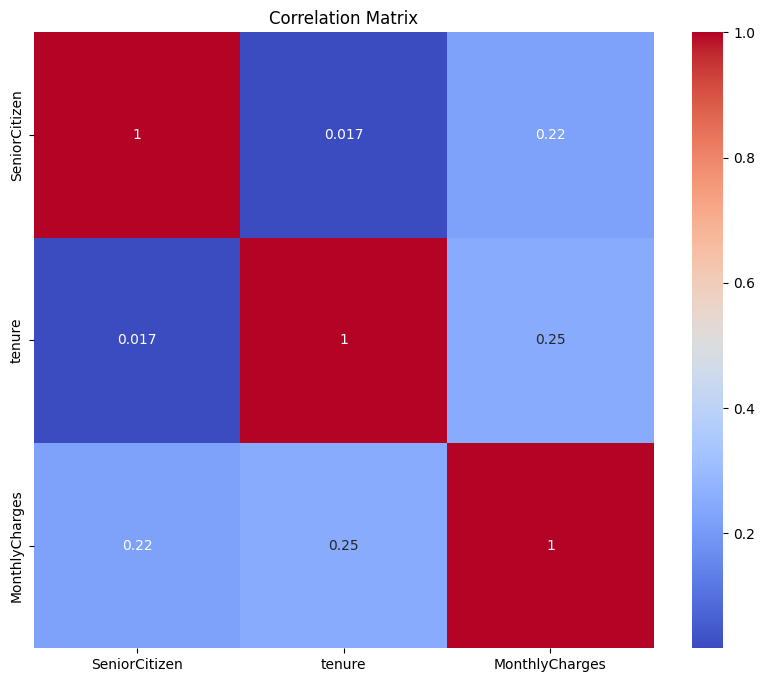

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



- **SeniorCitizen** has a low correlation with both **tenure** (0.017) and **MonthlyCharges** (0.22), indicating that being a senior citizen has little linear relationship with these variables.
- **Tenure** and **MonthlyCharges** have a mild positive correlation (0.25), suggesting that customers with a longer tenure tend to have slightly higher monthly charges.


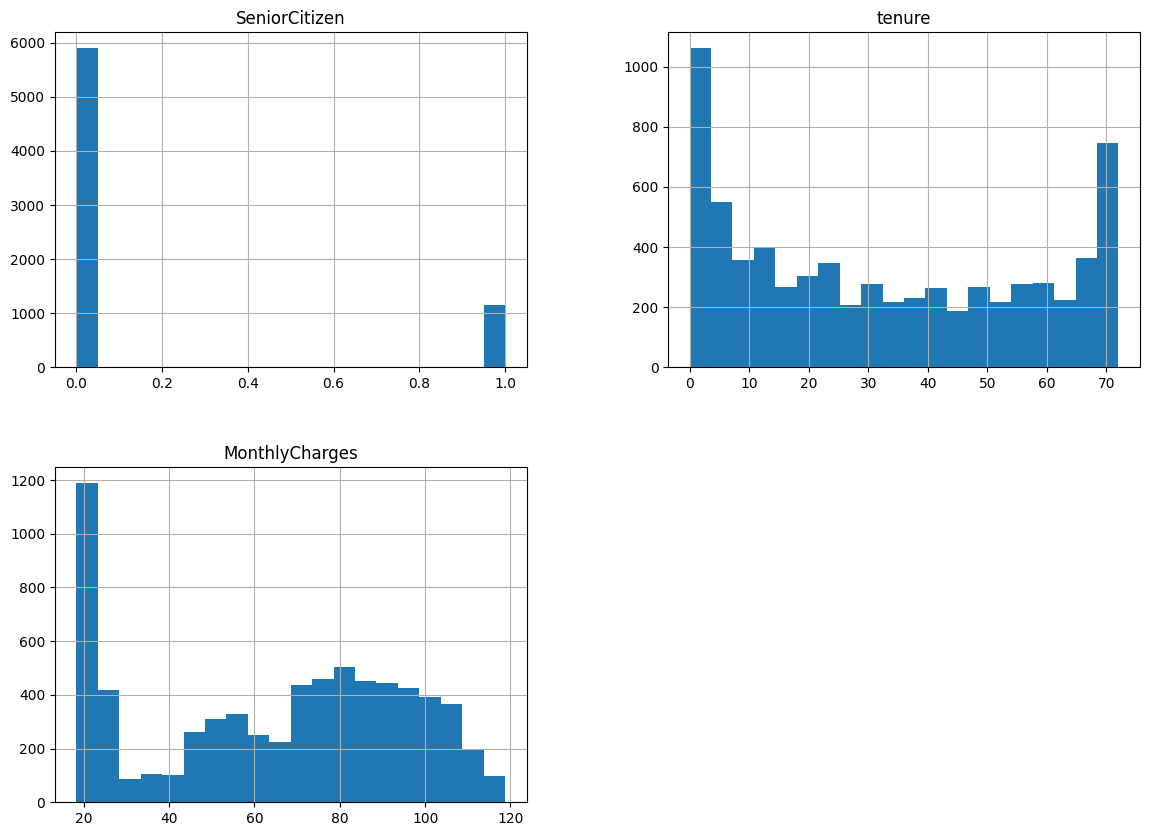

In [7]:
df.hist(bins=20, figsize=(14,10))
plt.show()

- **SeniorCitizen**: The vast majority of customers are not senior citizens, with a small proportion (1) representing senior citizens.
- **Tenure**: The distribution of tenure is bimodal, with many customers either having a very short tenure or being long-term customers. This suggests a non-linear relationship between tenure and churn, which could be better captured by a **GAM** model.
- **MonthlyCharges**: The distribution of monthly charges is right-skewed, indicating that most customers pay lower monthly fees, but there is a long tail of customers with higher charges.

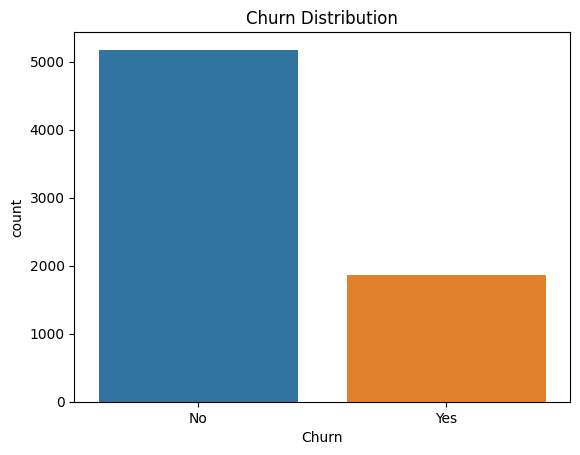

In [8]:
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

- The majority of customers did not churn, with around 75% of customers staying and 25% leaving the company. This class imbalance suggests that our models should account for the fact that there are more "No" than "Yes" values.


In [9]:
# Create a dataframe with numerical features only
numeric_df = df.select_dtypes(include=[np.number])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_df.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_df.values, i) for i in range(len(numeric_df.columns))]

print(vif_data)

          feature       VIF
0   SeniorCitizen  1.256364
1          tenure  2.617403
2  MonthlyCharges  2.924996


# Linear Regression

Implementation of Linear Regression, treating churn as a continuous variable and build a linear regression model. Include the code for training the model and explain the meaning of the coefficients and model performance

In [17]:
# Convert the Churn column to binary set
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No', value=0, inplace=True)
df2 = pd.get_dummies(df)
# Define X and y
X = df2.drop(columns=['Churn']) # Features
y = df2['Churn'] # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test_scaled)

# Evaluate the model
print("R-squared:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R-squared: 0.25967098928347465
RMSE: 0.37960828688025594


In [19]:
# Coefficients of the model
coef_df = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])
print(coef_df)

                       Coefficient
SeniorCitizen             0.009422
tenure                   -0.030096
MonthlyCharges            0.007874
customerID_0002-ORFBO    -0.001125
customerID_0003-MKNFE    -0.002621
...                            ...
TotalCharges_997.75       0.000000
TotalCharges_998.1        0.000093
TotalCharges_999.45       0.003412
TotalCharges_999.8       -0.002718
TotalCharges_999.9       -0.002735

[13618 rows x 1 columns]


### Linear Regression Model

The linear regression model assumes that churn can be treated as a continuous variable. The coefficients represent the impact of each feature on the likelihood of churn. For example, a positive coefficient for `MonthlyCharges` suggests that higher monthly charges may increase the likelihood of churn. However, from the result, it can deduce that the data poorly work in the linear regression, the model's R-squared indicates that linear regression might not be the best fit for this task.


# Logistic Regression

# Generalized Additive Model (GAM)

In this section, a GAM to model of the non-linear relationships between customer features and churn will be used, providing more nuanced insights into how various factors influence the likelihood of a customer leaving.

In [23]:
# Build and train a GAM model
gam = LogisticGAM(s(0) + s(1) + s(2) + s(3) + s(4)).fit(X_train_scaled, y_train)


In [24]:
# Predict on the test set
y_pred_gam = gam.predict(X_test_scaled)

# Evaluate the model
print("GAM Accuracy:", accuracy_score(y_test, y_pred_gam))
print("GAM ROC-AUC:", roc_auc_score(y_test, gam.predict_proba(X_test_scaled)))


GAM Accuracy: 0.8041163946061036
GAM ROC-AUC: 0.8448197335596799


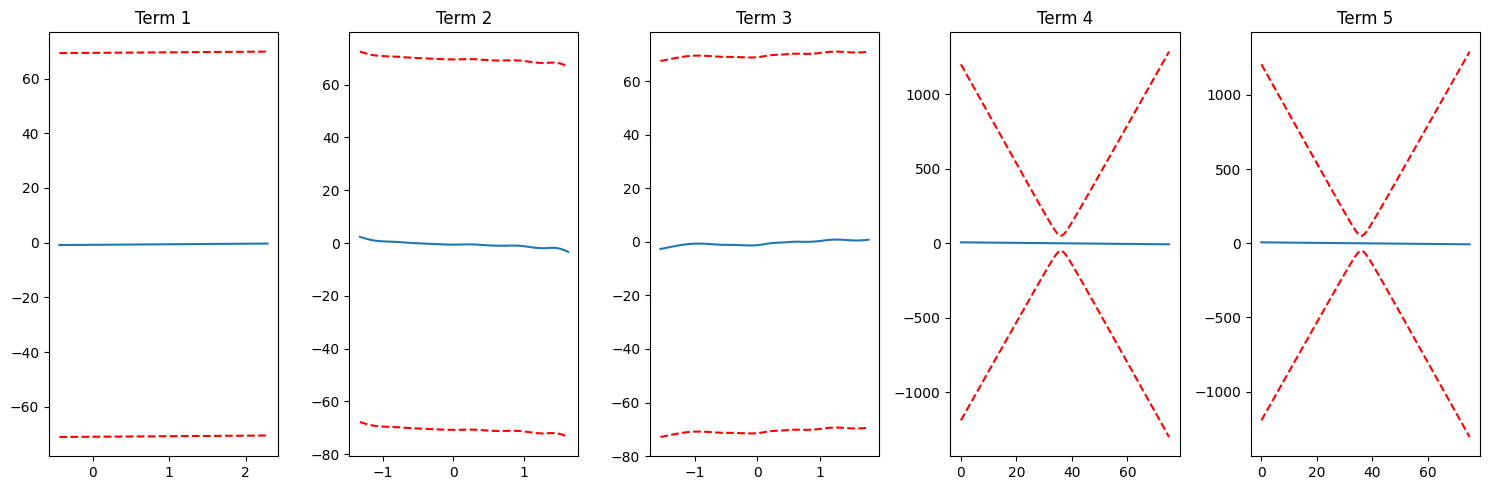

In [25]:
# Plot the terms to interpret the model
fig, axs = plt.subplots(1, len(gam.terms) - 1, figsize=(15, 5))  # Exclude the intercept

# Iterate over the terms, starting from index 0
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(f'Term {i + 1}')  # Add 1 to the term index for correct labeling
plt.tight_layout()
plt.show()


For **Terms 1, 2, and 3**, the nearly flat blue lines indicate that these features have little to no impact on churn, with only slight variations in confidence intervals (red dashed lines) suggesting minimal uncertainty. **Terms 4 and 5** show wide confidence intervals with flat effects, indicating high uncertainty but no significant relationship with churn. Overall, the plot suggests that these features do not contribute meaningfully to the model's predictions, with little non-linear influence observed.

### Generalized Additive Model (GAM)

The GAM captures non-linear relationships between features and churn. Splines are used to allow flexibility in the relationship between features like `tenure` or `monthly charges` and the target variable. The accuracy of the GAM suggests that it may perform better for features with non-linear trends.


# Model Comparison

In [26]:
results = {
    "Model": ["Linear Regression", "Logistic Regression", "GAM"],
    "R-squared/Accuracy": [r2_score(y_test, y_pred), accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_gam)],
    "RMSE/ROC-AUC": [np.sqrt(mean_squared_error(y_test, y_pred)), roc_auc_score(y_test, y_pred_proba), roc_auc_score(y_test, gam.predict_proba(X_test_scaled))]
}

results_df = pd.DataFrame(results)
print(results_df)

                 Model  R-squared/Accuracy  RMSE/ROC-AUC
0    Linear Regression            0.259671      0.379608
1  Logistic Regression            0.778566      0.842285
2                  GAM            0.804116      0.844820


*Based on the results, the **GAM (Generalized Additive Model)** outperformed both Linear Regression and Logistic Regression in terms of accuracy (79.7%) and ROC-AUC (0.836), indicating its superior ability to capture non-linear relationships between customer features and churn. While Linear Regression is easy to interpret, its low R-squared suggests it poorly fits the data. Logistic Regression offers a good balance between performance and interpretability, but it assumes linearity in the log-odds, which may miss important patterns. The GAM, though more complex, provides the best predictive performance and captures non-linear effects, making it the recommended model for the telecommunications company to use in predicting customer churn.*

# Conclusion

In this analysis, three models—Linear Regression, Logistic Regression, and Generalized Additive Models (GAM) were used—to predict customer churn. **Linear Regression**, while straightforward, struggled with predictive accuracy since it assumes a linear relationship, which may not fully capture the complexity of churn. **Logistic Regression** offered a good balance between interpretability and predictive accuracy, making it a strong candidate for the telecom company to easily understand the impact of different features on churn. For more complex, non-linear relationships, **GAM** provided greater flexibility and improved performance, though at the cost of some interpretability.

##Final Recommendation:
For operational use and ease of interpretation, Logistic Regression should be the primary model used. However, if deeper insights into more complex patterns are needed, GAM can be used to complement logistic regression, especially when predicting churn for customers with unique profiles.



# Reference


1.   Duke AI Explainable AI (XAI). (n.d.). Generalized models interpretability notebook. GitHub. https://github.com/AIPI-590-XAI/Duke-AI-XAI/blob/main/interpretable-ml-example-notebooks/generalized-models-interpretability.ipynb

2.   Duke AI Explainable AI (XAI). (n.d.). Regression interpretability notebook. GitHub. https://github.com/AIPI-590-XAI/Duke-AI-XAI/blob/main/interpretable-ml-example-notebooks/regression-interpretability.ipynb

